I need to create a celestial bodies database using PostgreSQL for [this freeCodeCamp project](https://www.freecodecamp.org/learn/relational-database/build-a-celestial-bodies-database-project/build-a-celestial-bodies-database). If the term "celestial bodies" is unfamiliar to you, it refers to the planets, stars, moons, and other natural things found in space. And, without a doubt, the first step in creating a database with multiple tables is data preparation. 

In this notebook, I'll demonstrate how I prepare data before beginning to write SQL queries. Every piece of information in the tables that I will build in this notebook has been gathered from the internet, so any corrections to the information provided here are greatly appreciated.

## Rules for celestial bodies database

Let's look at the guidelines we need to follow for this project in order to build acceptable tables. 

These are the requirements that we must fulfill while creating the tables:

*   The database should have **at least 5 tables**.
*   There must be a table of:
  *   galaxy ($\geq 6$ rows)
  *   star ($\geq 6$ rows)
  *   planet ($\geq 12$ rows)
  *   moon ($\geq 20$ rows)
*   Each **table** should have **at least 3 rows** and **3 columns**.
*   The galaxy, star, planet, and moon tables should each have at least 5 columns.

---

*   A primary key should be included in each table. The naming standard for primary key columns should be `table_name_id`. The `moon` table, for example, should include a primary key column called `moon_id`.
*   Each table should have a `name` column.

---

*   The **INT** data type must be used in **at least two columns** that are not the primary or foreign keys.
*   The **NUMERIC** data type must be used **at least once**.
*   The **TEXT** data type must be used **at least once**.
*   The **BOOLEAN** data type must be used in **at least two columns**.
*   At least 2 columns per table should not accept NULL values
*   At least 1 column from each table should be required to be UNIQUE

---

*   Each `star` should have a foreign key that references one of the rows in `galaxy`.
*   Each `planet` should have a foreign key that references one of the rows in `star`.
*   Each `moon` should have a foreign key that references one of the rows in `planet`.
*   Each foreign key column should have the same name as the column it is referencing.

## Finding data sources

I was never interested in astronomy before this assignment. I didn't know much about the names of stars, moons (except our moon), or even the name of the galaxy we live in. I'm sorry. However, I am quite familiar with the names of planets. So, the first question that came to my mind was, "What are things that I can classify as celestial bodies?" There are seven of them, as it turns out: stars, planets, satellites (our moon is Earth's natural satellite), comets, asteroids, meteors and meteorites, and galaxies.

Wow, we can make seven tables about celestial bodies, but let's keep things simple. You may recall from the rules that I am required to create a table of galaxies, stars, planets, and moons. They are four tables in total, and I require at least five. Let's start with the four; perhaps there's a way to figure out what's needed in the other tables.

In my search for websites that can provide me with tables, I came across a website called "[Little Astronomy](https://littleastronomy.com/)," which I found to be both interesting and useful. Here are the links I chose to start web scraping with:

*   [The Complete List of Galaxy Names](https://littleastronomy.com/galaxy-names/)
*   [List of stars per constellation](https://littleastronomy.com/list-of-stars-per-constellation/)
*   [Star Names That Start With A](https://littleastronomy.com/star-names-that-start-with-a/) and there is a page for each letter from A to Z
*   [Moon Names: The Complete List](https://littleastronomy.com/moon-names/)


When you click on the links, you'll notice that the table of galaxy and star names contains a column called "Constellation," which describes the constellation in which the galaxy is located or the group of stars to which the star belongs. 

It inspires me to create its own table, the constellation table. However, there isn't much information about constellations on this website other than their names, so I went to another website, [IAU designated constellations from Wikipedia](https://en.wikipedia.org/wiki/IAU_designated_constellations). Moreover, I find a planet table on this website, [Planet from Wikipedia](https://en.wikipedia.org/wiki/Planet#Solar_System). 

So, that's all the information I have for now. We can always find additional sources as we work on the tables. Let's get started on the first table right away. 

We can begin at any table, but I prefer to begin with the moon table. Why? Because the rules state that the moon table should refer to the planet table, which refers to the star table, which refers to the galaxy table. So I believe I can begin with the first table in this chain. That's what I think, but surely you can start building from any table.

## Creating the first table: moon table

The web scraping codes provided below were inspired by [this Medium article](https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451). I like its simplicity and detailed explanation of the article, so you might want to check it out as well.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
page = requests.get('https://littleastronomy.com/moon-names/')
soup = BeautifulSoup(page.text, 'lxml')

# I create the "headers" list directly because I prefer to name the columns myself
headers = ['name', 'planet', 'year_discovered']

# Initialize the table
df_moon = pd.DataFrame(columns = headers)

# Enter data for each row into the dataframe
table = soup.find("table")
for table_row in table.find_all('tr')[1:]:
  data = [table_data.text.strip() for table_data in table_row.find_all('td')]
  df_moon.loc[len(df_moon)] = data

# Display the table
df_moon

,name,planet,year_discovered
0,Moon,Earth,–
1,Phobos,Mars,1877
2,Deimos,Mars,1877
3,Io,Jupiter,1610
4,Europa,Jupiter,1610
...,...,...,...
162,Namaka,Haumea,2005
163,Weywot,Quaoar,2007
164,Ilmarë,Varda,2009
165,Xiangliu,Gonggong,2010


Hmm, there should be at least five columns, not four (including moon id, which we will add later). Let's add one more column. 

I find [this website](https://courses.lumenlearning.com/suny-astronomy/chapter/selected-moons-of-the-planets/) helpful. It includes many additional columns, but I'll only include one that I find interesting. I'll go with "Diameter (km)", then. Let us now retrieve another table.

But wait. While I could obtain all of the rows and columns, I only require the `Satellite Name` and `Diameter (km)` columns. If you look at the table on the website, you'll notice that some of the `<tr>` tags have eight `<td>` in them, while others only have seven. This is due to the fact that they combine rows in `Planet (moons)` column for moons from the same planet. So, be careful when writing the codes.

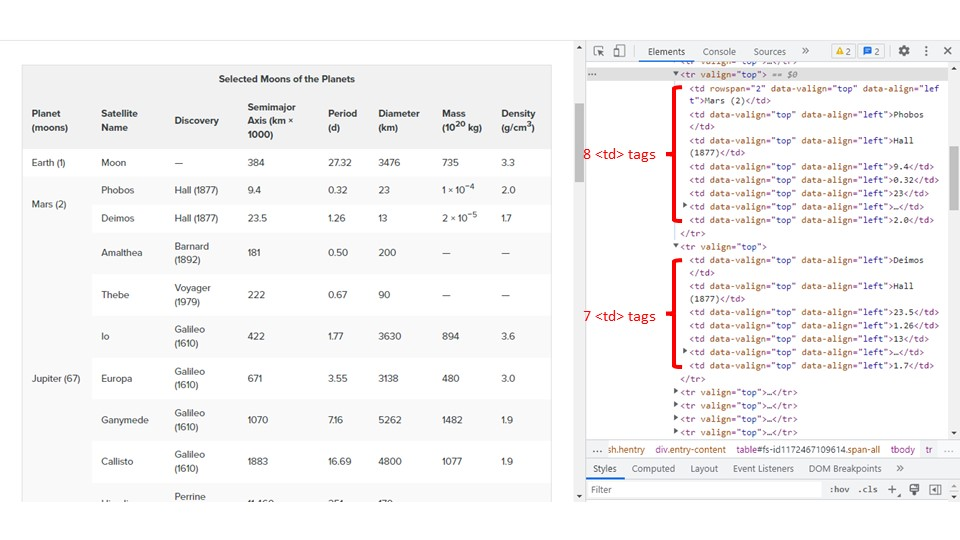

In [ ]:
page = requests.get('https://courses.lumenlearning.com/suny-astronomy/chapter/selected-moons-of-the-planets/')
soup = BeautifulSoup(page.text, 'lxml')

# I set the new column name 
headers = ['name', 'diameter_in_km']
df_moon_diameter = pd.DataFrame(columns=headers)

# This part is almost identical to the previous one
table = soup.find("table")
for table_row in table.find_all('tr')[2:]:
  rows = table_row.find_all('td')
  data = np.array([table_data.text.strip() for table_data in rows])
  # I make an adjustment to take only information about the moon's name and diameter
  selected_data = [data[[1, 5]] if len(data) == 8 else data[[0, 4]]]
  table_idx = len(df_moon_diameter)
  df_moon_diameter.loc[table_idx] = selected_data[0]

# Show the first five records in the table
df_moon_diameter.head()

,name,diameter_in_km
0,Moon,3476
1,Phobos,23
2,Deimos,13
3,Amalthea,200
4,Thebe,90


Now we just need to join those two tables together.

In [ ]:
# If you use outer join
moon_outer_join = pd.merge(df_moon, df_moon_diameter, on='name', how='outer')
# and check for rows that have null values
moon_outer_join[moon_outer_join.isnull().any(axis=1)]

,name,planet,year_discovered,diameter_in_km
9,Elara,Jupiter,1905,NaN
10,Pasiphae,Jupiter,1908,NaN
11,Sinope,Jupiter,1914,NaN
12,Lysithea,Jupiter,1938,NaN
13,Carme,Jupiter,1938,NaN
...,...,...,...,...
165,Xiangliu,Gonggong,2010,NaN
166,Dysnomia,Eris,2005,NaN
167,Dysnomea,NaN,NaN,684
168,(MK2),NaN,NaN,160


There are three moons that don't appear on the `df_moon`'s table. However, the row with indexes 166 and 167 appears to have a name that is similar which raises suspicions. 

According to the website, Dysnomea is Eris's moon, MK2 is Makemake's moon, and Hi’iaka is Haumea's moon. So, let's check the moons of these planets from the `df_moon` table.

In [ ]:
# First, we first check what planets are in the table
df_moon.planet.unique()

array(['Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Orcus',
       'Pluto', 'Salacia', 'Haumea', 'Quaoar', 'Varda', 'Gonggong',
       'Eris'], dtype=object)

Planet `Makemake` doesn't exist in the `df_moon` table in the first place, so let's add it to the table with a little change in the moon's name.

In [ ]:
# Remember, df_moon has a column of moon_id, name, planet, and year_discovered
df_moon.loc[len(df_moon)] = [
    'MK2',
    'Makemake',
    2016
]

# We also need to change the moon's name in df_moon_diameter table
df_moon_diameter.replace('(MK2)', 'MK2', inplace=True)

We will now find out about the moon of Eris and Haumea that are listed in the `df_moon` and `df_moon_diameter` table.

In [ ]:
df_moon[df_moon['planet'].isin(['Eris', 'Haumea'])]

,name,planet,year_discovered
161,Hiʻiaka,Haumea,2005
162,Namaka,Haumea,2005
166,Dysnomia,Eris,2005


In [ ]:
df_moon_diameter[df_moon_diameter['name'].isin(['Dysnomea', 'Hi’iaka'])]

,name,diameter_in_km
41,Dysnomea,684
43,Hi’iaka,400


Since they actually refer to the same moon, we can change `Dysnomea` to `Dysnomia`, but what's wrong with `Hi'iaka`, the moon of `Haumea`?

In [ ]:
print(df_moon.loc[161, 'name'])
print(df_moon_diameter.loc[43, 'name'])

Hiʻiaka
Hi’iaka


Great. They do differ in one character as well. Let's give it the same name as it appears in the `df_moon` table.

In [ ]:
df_moon_diameter.loc[41, 'name'] = 'Dysnomia'
df_moon_diameter.loc[43, 'name'] = 'Hiʻiaka'

The `diameter_in_km` column of the `moon_outer_join` table would now be the only one that has null values. 

If we tried to remove the rows with null values or use an inner join, the same table would be returned to us in this case. I'm fine with having multiple null values in a single column, but I'd rather not have too many of them. Additionally, as shown by the code below, if we use an inner join, we will only end up with 10 names for planets, whereas if we use an outer join, we can have 15 names. I made the decision to keep all of the names of the planets with moons. How can we then maintain the names of 15 planets while minimizing the number of null values?

In [ ]:
moon_outer = pd.merge(df_moon, df_moon_diameter, on='name', how='outer')
moon_inner = pd.merge(df_moon, df_moon_diameter, on='name', how='inner')

In [ ]:
planet_outer = moon_outer.planet.unique()
print(f'If we use an outer join, there will be {len(planet_outer)} planets.')
print(planet_outer)

print('\n')

planet_inner = moon_inner.planet.unique()
print(f'If we use an inner join, there will be {len(planet_inner)} planets.')
print(planet_inner)

If we use an outer join, there will be 15 planets.
['Earth' 'Mars' 'Jupiter' 'Saturn' 'Uranus' 'Neptune' 'Orcus' 'Pluto'
 'Salacia' 'Haumea' 'Quaoar' 'Varda' 'Gonggong' 'Eris' 'Makemake']


If we use an inner join, there will be 10 planets.
['Earth' 'Mars' 'Jupiter' 'Saturn' 'Uranus' 'Neptune' 'Pluto' 'Haumea'
 'Eris' 'Makemake']


In my opinion, the names of planets that don't exist in `planet_inner` should be kept. Or, to put it another way, we will remove rows with null values if the planet name is not what we want to keep.

In [ ]:
# find the names of planets that we want to keep
to_keep = [planet for planet in planet_outer if planet not in planet_inner]
print(to_keep)

['Orcus', 'Salacia', 'Quaoar', 'Varda', 'Gonggong']


In [ ]:
# Rows with NaN values
condition_1 = moon_outer['diameter_in_km'].isnull()

# Rows we want to keep
condition_2 = moon_outer['planet'].isin(to_keep)

# Row indexes where NaN values exist, but the planet name is not what we want to keep
idx_to_remove = moon_outer[condition_1 & ~condition_2].index

# Reset the index after removing the selected indexes
df_moon = moon_outer.drop(idx_to_remove).reset_index(drop=True)

# Show the last ten records in the dataframe
df_moon.tail(10)

,name,planet,year_discovered,diameter_in_km
40,Kerberos,Pluto,2011,28
41,Styx,Pluto,2012,20
42,Actaea,Salacia,2006,NaN
43,Hiʻiaka,Haumea,2005,400
44,Namaka,Haumea,2005,200
45,Weywot,Quaoar,2007,NaN
46,Ilmarë,Varda,2009,NaN
47,Xiangliu,Gonggong,2010,NaN
48,Dysnomia,Eris,2005,684
49,MK2,Makemake,2016,160


In [ ]:
# Add the "moon_id" column
df_moon.reset_index(inplace=True)
df_moon.rename(columns={'index': 'moon_id'}, inplace=True)
df_moon['moon_id'] += 1

# Display the table
df_moon.head(10)

,moon_id,name,planet,year_discovered,diameter_in_km
0,1,Moon,Earth,–,3476
1,2,Phobos,Mars,1877,23
2,3,Deimos,Mars,1877,13
3,4,Io,Jupiter,1610,3630
4,5,Europa,Jupiter,1610,3138
5,6,Ganymede,Jupiter,1610,5262
6,7,Callisto,Jupiter,1610,4800
7,8,Amalthea,Jupiter,1892,200
8,9,Himalia,Jupiter,1904,170
9,10,Thebe,Jupiter,1979,90


In [ ]:
# Let's check the number of planets one last time
len(df_moon.planet.unique())

15

I think it's safe now to create the next table, the planet table. 

Later, using the planet table we created, we will replace the `planet` column in the `df_moon` table with the `planet_id`.

## Creating the planet table

Now we will continue to create the next table: the planet table. 

Let's start by looking at a list of the planets' names that corresponds to the moon table from earlier. Keep in mind that every moon ought to have a foreign key that refers to one of the planet table's rows. Therefore, we must ensure that the planet table contains this list of planets.

In [ ]:
must_have_planets = df_moon.planet.unique()
print(must_have_planets)

['Earth' 'Mars' 'Jupiter' 'Saturn' 'Uranus' 'Neptune' 'Orcus' 'Pluto'
 'Salacia' 'Haumea' 'Quaoar' 'Varda' 'Gonggong' 'Eris' 'Makemake']


Now, let's use web scraping to obtain the planet table from [this website](https://en.wikipedia.org/wiki/Planet#Solar_System).

In [ ]:
# Remember to import the required library
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
page = requests.get('https://en.wikipedia.org/wiki/Planet#Solar_System')
soup = BeautifulSoup(page.text, 'lxml')

# Find the columns' name and save in headers list
table = soup.find_all("table")[3]
tag = table.find('tr').find_all('th')
headers = [p.text.strip() for p in tag]

# Initialize the table
planet = pd.DataFrame(columns = headers)

# Enter data for each row into the dataframe
for table_row in table.find_all('tr')[2:]:
  try:
    data = [table_data.text.strip() for table_data in table_row.find_all('td')]
    planet.loc[len(planet)] = data
  except:
    continue

# Display the table
planet

,,Name,Equatorialdiameter†,Mass†,Semi-major axis (AU),Orbital period(years),Inclinationto the ecliptic (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
0,1.,Mercury,0.383,0.06,0.39,0.24,7.00,0.206,58.65,0,0.04,no,minimal
1,2.,Venus,0.949,0.81,0.72,0.62,3.39,0.007,243.02,0,177.30,no,"CO2, N2"
2,3.,Earth‡,1.000,1.00,1.00,1.00,0.0,0.017,1.00,1,23.44,no,"N2, O2, Ar"
3,4.,Mars,0.532,0.11,1.52,1.88,1.85,0.093,1.03,2,25.19,no,"CO2, N2, Ar"
4,5.,Jupiter,11.209,317.83,5.20,11.86,1.30,0.048,0.41,80,3.13,yes,"H2, He"
5,6.,Saturn,9.449,95.16,9.54,29.45,2.49,0.054,0.44,83,26.73,yes,"H2, He"
6,7.,Uranus,4.007,14.54,19.19,84.02,0.773,0.047,0.72,27,97.77,yes,"H2, He, CH4"
7,8.,Neptune,3.883,17.15,30.07,164.79,1.77,0.009,0.67,14,28.32,yes,"H2, He, CH4"
8,,Ceres,0.0742,0.00016,2.77,4.60,10.59,0.080,0.38,0,4,no,minimal
9,,Orcus,0.072,0.0001,39.42,247.5,20.59,0.226,?,1,?,?,?


There are several columns, but I'll just use the columns that particularly interest me.

In [ ]:
# Get the desired columns
df_planet = planet[['Name', 'Orbital period(years)', 'Rotation period(days)', 'Confirmedmoons']]

# Change the names of columns
df_planet = df_planet.rename(columns={
    'Name' : 'name', 
    'Orbital period(years)' : 'orbital_period_in_years', 
    'Rotation period(days)' : 'rotation_period_in_days', 
    'Confirmedmoons' : 'has_moon'
})

# Replace '?' with NaN
df_planet = df_planet.replace('?', np.NaN)

# Modify the values in "has_moon" column
df_planet['has_moon'] = df_planet['has_moon'].astype(int)
df_planet['has_moon'] = df_planet['has_moon'].apply(np.sign).replace({0: False, 1: True})

# The name of Earth seems wrong, so I'll fix it
df_planet.loc[2, 'name'] = 'Earth'

# Display the table once again
df_planet

,name,orbital_period_in_years,rotation_period_in_days,has_moon
0,Mercury,0.24,58.65,False
1,Venus,0.62,243.02,False
2,Earth,1.00,1.00,True
3,Mars,1.88,1.03,True
4,Jupiter,11.86,0.41,True
5,Saturn,29.45,0.44,True
6,Uranus,84.02,0.72,True
7,Neptune,164.79,0.67,True
8,Ceres,4.60,0.38,False
9,Orcus,247.5,NaN,True


Now that I feel comfortable with the table, let's see if it contains every planet on the `must_have_planets` list. If not, we will have to include the planets' information that is missing from the table.

In [ ]:
for planet_name in must_have_planets:
  if planet_name not in df_planet.name.values: 
    print(planet_name)

Salacia
Varda


You can see from the code above that the data for the planets [Salacia](https://en.wikipedia.org/wiki/120347_Salacia) and [Varda](https://en.wikipedia.org/wiki/174567_Varda) is not yet included in the table. So, we'll include it.

In [ ]:
# Add a row for planet 'Salacia' into planet table
df_planet.loc[len(df_planet)] = ['Salacia', 273.98, round(6.09/24, 2), True]

# Add a row for planet 'Varda' into planet table
df_planet.loc[len(df_planet)] = ['Varda', 313.12, round(5.61/24, 2), True]

# Add the "planet_id" column
df_planet.reset_index(inplace=True)
df_planet.rename(columns={'index': 'planet_id'}, inplace=True)
df_planet['planet_id'] += 1

# Display the planet table's last five rows
df_planet.tail()

,planet_id,name,orbital_period_in_years,rotation_period_in_days,has_moon
14,15,Gonggong,552.5,0.93,True
15,16,Eris,559,14.56,True
16,17,Sedna,12059,0.43,False
17,18,Salacia,273.98,0.25,True
18,19,Varda,313.12,0.23,True


We can update the `planet` column in the moon table with the `planet_id` now that we have completed all the planet names and assigned each one a planet's id.

## Creating the first table: moon table (final)

In [ ]:
# Merge moon table and planet table, then match the planet's id and name
df_moon = pd.merge(df_moon, df_planet[['planet_id', 'name']], 
                   left_on='planet', right_on='name', 
                   how='inner')

# Drop "planet" and "name_y" columns
df_moon.drop(['planet', 'name_y'], axis=1, inplace=True)

# Change "name_x" column to "name" column
df_moon.rename(columns={'name_x': 'name'}, inplace=True)

# Display the first five rows of the final moon table
df_moon.head()

,moon_id,name,year_discovered,diameter_in_km,planet_id
0,1,Moon,–,3476,3
1,2,Phobos,1877,23,4
2,3,Deimos,1877,13,4
3,4,Io,1610,3630,5
4,5,Europa,1610,3138,5


## Creating constellation and star tables

Since each planet should have a foreign key that refers to one of the rows in the star table, we might want to start thinking about how to connect the dots between the planet table and the star table. 

The best solution I could come up with is to use a constellation table. The constellation that the planet is "in" could be located. As the planets orbit the sun in a plane, they are much closer to us than the background stars and only appear to move through certain constellations ([source](http://www.appstate.edu/~goodmanjm/rcoe/elemscience/astronomy/zodiac.html)), hence the double quotation marks. And when I say background stars, I'm referring to the constellations, which are meaningful star patterns in the sky. The brightest star is also found in each constellation. Therefore, we could add a column to the planet table that indicates the brightest star in the constellation the planet is in.

In [ ]:
df_planet.name.values

array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus',
       'Neptune', 'Ceres', 'Orcus', 'Pluto', 'Haumea', 'Quaoar',
       'Makemake', 'Gonggong', 'Eris', 'Sedna', 'Salacia', 'Varda'],
      dtype=object)

In [ ]:
planet_constellation = {
    'Mercury' : 'Virgo', #1
    'Venus' : 'Leo', #1
    'Earth' : 'Centaurus',
    'Mars' : 'Taurus', #!
    'Jupiter' : 'Cetus', #!
    'Saturn' : 'Capricornus', #!
    'Uranus' : 'Aries', #!
    'Neptune' : 'Aquarius', #!
    'Ceres' : 'Leo', #2
    'Orcus' : 'Sagittarius', 
    'Pluto' : 'Sagittarius', #2 
    'Haumea' : 'Boötes', #2
    'Quaoar' : 'Ophiuchus', #3
    'Makemake' : 'Coma Berenices', #2 
    'Gonggong' : 'Aquarius', #4
    'Eris' : 'Cetus', #2
    'Sedna' : 'Taurus', #2
    'Salacia' : 'Pegasus', 
    'Varda' : 'Aquarius'
}

[1] The Sky Live, *Major Solar System Objects*, https://theskylive.com/planets

[2] The Sky Live, *Asteroids*, https://theskylive.com/asteroids-and-dwarf-planets

[3] *50000 Quaoar*. https://usuaris.tinet.cat/klunn/quaoar.html

[4] Wikipedia, *225088 Gonggong*, https://en.wikipedia.org/wiki/225088_Gonggong


Earth, Orcus, and Varda are the three planets for whom I am unable to locate any information on their constellation. However, according to [this article](https://www.space.com/18964-the-nearest-stars-to-earth-infographic.html), the stars closest to Earth are found in the constellation Centaurus, so I'll put Centaurus in the table as the constellation of Earth. Orcus is also known as Plutino, so I think it probably wouldn't be wrong to designate Sagittarius as its constellation. In addition, Varda is a binary trans-Neptunian planetoid, thus I give it the same constellation as Neptune, which is Aquarius.

In [ ]:
# Turn the dictionary into a table
df_planet_constellation = pd.DataFrame.from_dict(planet_constellation, orient='index').reset_index()
df_planet_constellation.columns = ['planet', 'constellation']
df_planet_constellation

,planet,constellation
0,Mercury,Virgo
1,Venus,Leo
2,Earth,Centaurus
3,Mars,Taurus
4,Jupiter,Cetus
5,Saturn,Capricornus
6,Uranus,Aries
7,Neptune,Aquarius
8,Ceres,Leo
9,Orcus,Sagittarius


We can use web scraping again on [this Wikipedia page](https://en.wikipedia.org/wiki/IAU_designated_constellations) to obtain the constellation table.

In [ ]:
# Don't forget to import the required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Get the table from Wikipedia page
page = requests.get('https://en.wikipedia.org/wiki/IAU_designated_constellations')
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find('table', {'class':"wikitable"})
df_constellation = pd.read_html(str(table))
df_constellation = pd.DataFrame(df_constellation[0])

# Choose the selected columns in the table
df_constellation = df_constellation[['Constellation', 'Origin', 'Meaning', 'Brightest star']]
df_constellation.columns = ['name', 'year_discovered', 'meaning', 'star']

# cleaning up the data in the table
df_constellation['name'] = [word.split('/')[0].strip() for word in df_constellation['name']]
df_constellation['year_discovered'] = df_constellation['year_discovered'].replace('ancient (Ptolemy)', '')
df_constellation['year_discovered'] = [year.split(',')[0] for year in df_constellation['year_discovered']]
df_constellation['meaning'] = df_constellation['meaning'].str.capitalize()

# Display the table
df_constellation

,name,year_discovered,meaning,star
0,Andromeda,,Andromeda (the chained maiden or princess),Alpheratz
1,Antlia,1763,Air pump,α Antliae
2,Apus,1603,Bird-of-paradise/exotic bird/extraordinary bird,α Apodis
3,Aquarius,,Water-bearer,Sadalsuud
4,Aquila,,Eagle,Altair
...,...,...,...,...
83,Ursa Minor,,Lesser bear,Polaris
84,Vela,1763,Sails,γ2 Velorum
85,Virgo,,Virgin or maiden,Spica
86,Volans,1603,Flying fish,β Volantis


Out of practicality, I would like to alter the star column's use of Greek letters on their records to our alphabet. And if you check further, the star's name also contains [8]s, so I'll omit them as well.

In [ ]:
df_constellation.star.values

array(['Alpheratz', 'α Antliae', 'α Apodis', 'Sadalsuud', 'Altair',
       'β Arae', 'Hamal', 'Capella', 'Arcturus', 'α Caeli',
       'β\xa0Camelopardalis', 'Tarf[8]', 'Cor Caroli', 'Sirius',
       'Procyon', 'Deneb Algedi', 'Canopus', 'Schedar[8]',
       'Rigil Kentaurus[8]', 'Alderamin', 'Diphda[8]', 'α Chamaeleontis',
       'α Circini', 'Phact', 'β Comae Berenices', 'Meridiana[8]',
       'Alphecca', 'Gienah', 'δ Crateris', 'Acrux', 'Deneb', 'Rotanev',
       'α Doradus', 'Eltanin[8]', 'Kitalpha', 'Achernar', 'Dalim[8]',
       'Pollux', 'Alnair', 'Kornephoros', 'α Horologii', 'Alphard',
       'β Hydri', 'α Indi', 'α Lacertae', 'Regulus', 'Praecipua', 'Arneb',
       'Zubeneschamali[8]', 'α Lupi', 'α Lyncis', 'Vega', 'α Mensae',
       'γ Microscopii', 'β Monocerotis', 'α Muscae', 'γ2 Normae',
       'ν Octantis', 'Rasalhague', 'Rigel', 'Peacock', 'Enif', 'Mirfak',
       'Ankaa', 'α Pictoris', 'Alpherg', 'Fomalhaut', 'Naos', 'α Pyxidis',
       'α Reticuli', 'γ Sagittae', 'Kau

In [ ]:
# Delete "[8]" from star names
regex_one = df_constellation[df_constellation.star.str.match('.*[8]')]
new_values = regex_one.star.str[:-3]
df_constellation.loc[regex_one.index, 'star'] = new_values

# Change the Alpha symbol to "Alpha"
regex_two = df_constellation[df_constellation.star.str.match('^α.*')]
new_values = 'Alpha ' + regex_two.star.str[2:]
df_constellation.loc[regex_two.index, 'star'] = new_values

# Change the Beta symbol to "Beta"
regex_three = df_constellation[df_constellation.star.str.match('^β.*')]
new_values = 'Beta ' + regex_three.star.str[2:]
df_constellation.loc[regex_three.index, 'star'] = new_values

# Change the delta symbol to "Delta"
regex_four = df_constellation[df_constellation.star.str.match('^δ.*')]
new_values = 'Delta ' + regex_four.star.str[2:]
df_constellation.loc[regex_four.index, 'star'] = new_values

# Change the gamma symbol to "Gamma"
regex_five = df_constellation[df_constellation.star.str.match('^γ.*')]
new_values = 'Gamma ' + regex_five.star.str[2:]
df_constellation.loc[regex_five.index, 'star'] = new_values

In [ ]:
df_constellation.star.values

array(['Alpheratz', 'Alpha Antliae', 'Alpha Apodis', 'Sadalsuud',
       'Altair', 'Beta Arae', 'Hamal', 'Capella', 'Arcturus',
       'Alpha Caeli', 'Beta Camelopardalis', 'Tarf', 'Cor Caroli',
       'Sirius', 'Procyon', 'Deneb Algedi', 'Canopus', 'Schedar',
       'Rigil Kentaurus', 'Alderamin', 'Diphda', 'Alpha Chamaeleontis',
       'Alpha Circini', 'Phact', 'Beta Comae Berenices', 'Meridiana',
       'Alphecca', 'Gienah', 'Delta Crateris', 'Acrux', 'Deneb',
       'Rotanev', 'Alpha Doradus', 'Eltanin', 'Kitalpha', 'Achernar',
       'Dalim', 'Pollux', 'Alnair', 'Kornephoros', 'Alpha Horologii',
       'Alphard', 'Beta Hydri', 'Alpha Indi', 'Alpha Lacertae', 'Regulus',
       'Praecipua', 'Arneb', 'Zubeneschamali', 'Alpha Lupi',
       'Alpha Lyncis', 'Vega', 'Alpha Mensae', 'Gamma Microscopii',
       'Beta Monocerotis', 'Alpha Muscae', 'Gamma  Normae', 'ν Octantis',
       'Rasalhague', 'Rigel', 'Peacock', 'Enif', 'Mirfak', 'Ankaa',
       'Alpha Pictoris', 'Alpherg', 'Fomalhaut

The star names of each planet can now be obtained using the constellation table, and we can then attempt to make the constellation table as simple as possible by omitting the constellation names that we do not use. I decided to approach this project in that manner. You can, however, choose to keep the names of each constellation.

In [ ]:
df_planet_star = pd.merge(df_planet_constellation, 
                          df_constellation[['name', 'star']], 
                          how='inner', 
                          left_on='constellation', 
                          right_on='name')

df_planet_star = df_planet_star[['planet', 'star']]
df_planet_star = df_planet_star.rename(columns={'planet': 'name'})
df_planet_star

,name,star
0,Mercury,Spica
1,Venus,Regulus
2,Ceres,Regulus
3,Earth,Rigil Kentaurus
4,Mars,Aldebaran
5,Sedna,Aldebaran
6,Jupiter,Diphda
7,Eris,Diphda
8,Saturn,Deneb Algedi
9,Uranus,Hamal


In [ ]:
keep_constellation = df_planet_constellation.constellation.unique()
keep_constellation

array(['Virgo', 'Leo', 'Centaurus', 'Taurus', 'Cetus', 'Capricornus',
       'Aries', 'Aquarius', 'Sagittarius', 'Boötes', 'Ophiuchus',
       'Coma Berenices', 'Pegasus'], dtype=object)

In [ ]:
df_constellation = df_constellation[df_constellation.name.isin(keep_constellation)]
df_constellation = df_constellation.reset_index(drop=True)
df_constellation

,name,year_discovered,meaning,star
0,Aquarius,,Water-bearer,Sadalsuud
1,Aries,,Ram,Hamal
2,Boötes,,Herdsman,Arcturus
3,Capricornus,,Sea goat,Deneb Algedi
4,Centaurus,,Centaur,Rigil Kentaurus
5,Cetus,,Sea monster (later interpreted as a whale),Diphda
6,Coma Berenices,1536,Berenice's hair,Beta Comae Berenices
7,Leo,,Lion,Regulus
8,Ophiuchus,,Serpent-bearer,Rasalhague
9,Pegasus,,Pegasus (mythological winged horse),Enif


Now that we have the constellation table, which includes star names, we can create a star table from it. That would indicate that the stars we will use are Sadalsuud, Hamal, Arcturus, Deneb Algedi, Rigil Kentaurus, Diphda, Beta Comae Berenices, Regulus, Rasalhague, Enif, Kaus Australis, Aldebaran, and Spica. 

If you remember "[Little Astronomy](https://littleastronomy.com/)," there are two links that we can use to construct a star table. Actually, it is made up of many star lists. And while I have made an effort to gather data from the website, doing so would require more work than simply manually gathering the data on each of our desired stars. Therefore, I will create a separate article about the web scraping process used to gather star tables from that website. For the time being, I'll just create a dictionary that we can later turn into a star table. 

We need also to remember that each star should have a foreign key that references one of the rows in the galaxy table. However, Little Astronomy doesn't provide information about the galaxy of each star, so I have to look it up on [this website](https://www.universeguide.com/). Don't forget to include the `star_id` column as well.

In [ ]:
star_dict = {
    'star_id' : list(range(1, 14)),
    'name' : ['Sadalsuud', 'Hamal', 'Arcturus', 'Deneb Algedi', 'Rigil Kentaurus', 'Beta Comae Berenices', 
              'Regulus', 'Aldebaran', 'Diphda', 'Enif', 'Kaus Australis', 'Rasalhague', 'Spica'],
    'distance_in_light_years' : [612.00, 66, 37.00, 39, 4.36, 30.00, 77.00, 
                                 65.23, 96.22, 688.2, 143.2, 48.6, 260.9],
    'brightness_of_star' : [2.90, 2.01, 0.05, 2.85, 0.01, 4.26, 1.36, 
                            0.85, 2.04, 2.4, 1.85, 2.08, 1.04],
    'approval_date' : ['2016-08-21', '2016-07-20', '2016-06-30', '2017-02-01', '2016-11-06', np.NaN, 
                       '2016-06-30', '2016-06-30', '2016-08-21', '2016-07-20', '2016-07-20', '2016-07-20', '2016-06-30'],
    'galaxy' : ['Milky Way'] * 13
}

df_star = pd.DataFrame.from_dict(star_dict)
df_star

,star_id,name,distance_in_light_years,brightness_of_star,approval_date,galaxy
0,1,Sadalsuud,612.00,2.90,2016-08-21,Milky Way
1,2,Hamal,66.00,2.01,2016-07-20,Milky Way
2,3,Arcturus,37.00,0.05,2016-06-30,Milky Way
3,4,Deneb Algedi,39.00,2.85,2017-02-01,Milky Way
4,5,Rigil Kentaurus,4.36,0.01,2016-11-06,Milky Way
5,6,Beta Comae Berenices,30.00,4.26,NaN,Milky Way
6,7,Regulus,77.00,1.36,2016-06-30,Milky Way
7,8,Aldebaran,65.23,0.85,2016-06-30,Milky Way
8,9,Diphda,96.22,2.04,2016-08-21,Milky Way
9,10,Enif,688.20,2.40,2016-07-20,Milky Way


We can add a `star_id` column to the planet table now that we have (almost) completed the star table. Later, we will also replace the `galaxy` column in this star table with the `galaxy_id`.

## Creating the planet table (final)

In [ ]:
# Add the star column to the planet table
df_planet = pd.merge(df_planet, df_planet_star, how='inner', on='name')

# Add the appropriate star_id to the planet table
df_planet = pd.merge(df_planet, df_star[['star_id', 'name']], how='inner', left_on='star', right_on='name')

# Omit the columns that are not needed
df_planet = df_planet.drop(columns=['star', 'name_y'])

# Change back the name of planet column to "name"
df_planet = df_planet.rename(columns={'name_x' : 'name'})

# Sort planet_id column and reset the index
df_planet = df_planet.sort_values(by='planet_id').reset_index(drop=True)

# Display the table
df_planet

,planet_id,name,orbital_period_in_years,rotation_period_in_days,has_moon,star_id
0,1,Mercury,0.24,58.65,False,13
1,2,Venus,0.62,243.02,False,7
2,3,Earth,1.00,1.00,True,5
3,4,Mars,1.88,1.03,True,8
4,5,Jupiter,11.86,0.41,True,9
5,6,Saturn,29.45,0.44,True,4
6,7,Uranus,84.02,0.72,True,2
7,8,Neptune,164.79,0.67,True,1
8,9,Ceres,4.60,0.38,False,7
9,10,Orcus,247.5,NaN,True,11


## Creating the constellation table (final)

The same procedures can also be applied to the constellation table to replace the star column with each star's id.

In [ ]:
# Add the appropriate star_id to the constellation table
df_constellation = pd.merge(df_constellation, df_star[['star_id', 'name']], how='inner', left_on='star', right_on='name')

# Omit the columns that are not needed
df_constellation = df_constellation.drop(columns=['star', 'name_y'])

# Change back the name of planet column to "name"
df_constellation = df_constellation.rename(columns={'name_x' : 'name'})

# Add the "constellation_id" column
df_constellation.reset_index(inplace=True)
df_constellation.rename(columns={'index': 'constellation_id'}, inplace=True)
df_constellation['constellation_id'] += 1

# Display the table
df_constellation

,constellation_id,name,year_discovered,meaning,star_id
0,1,Aquarius,,Water-bearer,1
1,2,Aries,,Ram,2
2,3,Boötes,,Herdsman,3
3,4,Capricornus,,Sea goat,4
4,5,Centaurus,,Centaur,5
5,6,Cetus,,Sea monster (later interpreted as a whale),9
6,7,Coma Berenices,1536,Berenice's hair,6
7,8,Leo,,Lion,7
8,9,Ophiuchus,,Serpent-bearer,12
9,10,Pegasus,,Pegasus (mythological winged horse),10


## Creating the last table: galaxy table (final)

We will now continue to use the same web scraping method as before to create the following table, the galaxy table.

In [ ]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
page = requests.get('https://littleastronomy.com/galaxy-names/')
soup = BeautifulSoup(page.text, 'lxml')

# Initialize the table
headers = ['name', 'designation', 'constellation', 'meaning']
df_galaxy = pd.DataFrame(columns = headers)

# Enter data for each row into the dataframe
table = soup.find("table")
for table_row in table.find_all('tr')[1:]:
  data = [table_data.text.strip() for table_data in table_row.find_all('td')]
  df_galaxy.loc[len(df_galaxy)] = data

# Delete "designation" column
df_galaxy = df_galaxy.drop(columns='designation')

# Add the contellation (center) of Milky Way 
df_galaxy.loc[26, 'constellation'] = 'Sagittarius'

# Show a snippet of the table.
df_galaxy.head(10)

,name,constellation,meaning
0,Andromeda,Andromeda,"In mythology, Andromeda is the daughter of the..."
1,Antennae Galaxy,Corvus,This is a dual galaxy. It gets its name becaus...
2,Backward Galaxy,Centaurus,It seems to rotate in the opposite direction t...
3,Black Eye Galaxy,Coma Berenices,It looks like an eye with a dark stripe undern...
4,Bode’s Galaxy,Ursa Major,"Named after the astronomer who discovered it, ..."
5,Butterfly Galaxies,Virgo,Binary galaxies. It looks like a pair of butte...
6,Cartwheel Galaxy,Sculptor,It looks a bit like a cartwheel
7,Centaurus A,Centaurus,Named because it’s located in the Centaurus co...
8,Cigar Galaxy,Ursa Major,It is shaped like a cigar
9,Circinus,Circinus,Latin for compass. Named after the constellati...


The table contains a total of 37 galaxies. Additionally, it contains a constellation column. Therefore, in order to keep things simple, I only want to keep a few of the names of the galaxies from the table. I will only use the galaxy's name whose constellation is listed in the previous constellation table in order to accomplish that.

In [ ]:
kept_constellation = df_constellation.name.values
df_galaxy = df_galaxy[df_galaxy.constellation.isin(kept_constellation)].reset_index(drop=True)
df_galaxy

,name,constellation,meaning
0,Backward Galaxy,Centaurus,It seems to rotate in the opposite direction t...
1,Black Eye Galaxy,Coma Berenices,It looks like an eye with a dark stripe undern...
2,Butterfly Galaxies,Virgo,Binary galaxies. It looks like a pair of butte...
3,Centaurus A,Centaurus,Named because it’s located in the Centaurus co...
4,Coma Pinwheel Galaxy,Coma Berenices,It looks like a paper pinwheel
5,Little Sombrero Galaxy,Pegasus,"It looks like a sombrero, but it’s smaller tha..."
6,Malin 1,Coma Berenices,"Named after its discoverer, David Malin"
7,Mice Galaxies,Coma Berenices,Two galaxies with long tails that look like a ...
8,Milky Way,Sagittarius,Our own galaxy. It is said to look like a band...
9,Needle Galaxy,Coma Berenices,Named because of its thin appearance


I will use the details of galaxies that are visible to the naked eye from [this website](https://en.wikipedia.org/wiki/List_of_galaxies) to create one more column. If a galaxy can be seen with the naked eye, it will be set to True; otherwise, it will be set to False. I do this because at least two columns must use the BOOLEAN data type in this database. To meet the requirement, let's add a column to this galaxy table since we already had one in the planet table.

In [ ]:
visible_galaxy = ['Milky Way', 'Large Magellanic Cloud', 'Small Magellanic Cloud', 'Andromeda', 
                  'Triangulum Galaxy', 'Centaurus A', 'Bode’s Galaxy', 'Sculptor Galaxy']
df_galaxy['is_visible_to_naked_eye'] = df_galaxy.apply(lambda row : True if row['name'] in visible_galaxy else False, axis=1)
df_galaxy

,name,constellation,meaning,is_visible_to_naked_eye
0,Backward Galaxy,Centaurus,It seems to rotate in the opposite direction t...,False
1,Black Eye Galaxy,Coma Berenices,It looks like an eye with a dark stripe undern...,False
2,Butterfly Galaxies,Virgo,Binary galaxies. It looks like a pair of butte...,False
3,Centaurus A,Centaurus,Named because it’s located in the Centaurus co...,True
4,Coma Pinwheel Galaxy,Coma Berenices,It looks like a paper pinwheel,False
5,Little Sombrero Galaxy,Pegasus,"It looks like a sombrero, but it’s smaller tha...",False
6,Malin 1,Coma Berenices,"Named after its discoverer, David Malin",False
7,Mice Galaxies,Coma Berenices,Two galaxies with long tails that look like a ...,False
8,Milky Way,Sagittarius,Our own galaxy. It is said to look like a band...,True
9,Needle Galaxy,Coma Berenices,Named because of its thin appearance,False


It is now time to add the galaxy's id and replace the `constellation` column with its id number.

In [ ]:
# Add the appropriate constellation_id to the galaxy table
df_galaxy = pd.merge(df_galaxy, 
                     df_constellation[['constellation_id', 'name']], 
                     how='inner', 
                     left_on='constellation', 
                     right_on='name')

# Omit the columns that are not needed
df_galaxy = df_galaxy.drop(columns=['constellation', 'name_y'])

# Change back the name of planet column to "name"
df_galaxy = df_galaxy.rename(columns={'name_x' : 'name'})

# Add the "galaxy_id" column
df_galaxy.reset_index(inplace=True)
df_galaxy.rename(columns={'index': 'galaxy_id'}, inplace=True)
df_galaxy['galaxy_id'] += 1

# Display the table
df_galaxy

,galaxy_id,name,meaning,is_visible_to_naked_eye,constellation_id
0,1,Backward Galaxy,It seems to rotate in the opposite direction t...,False,5
1,2,Centaurus A,Named because it’s located in the Centaurus co...,True,5
2,3,Black Eye Galaxy,It looks like an eye with a dark stripe undern...,False,7
3,4,Coma Pinwheel Galaxy,It looks like a paper pinwheel,False,7
4,5,Malin 1,"Named after its discoverer, David Malin",False,7
5,6,Mice Galaxies,Two galaxies with long tails that look like a ...,False,7
6,7,Needle Galaxy,Named because of its thin appearance,False,7
7,8,Butterfly Galaxies,Binary galaxies. It looks like a pair of butte...,False,13
8,9,Sombrero Galaxy,Looks like a sombrero,False,13
9,10,Little Sombrero Galaxy,"It looks like a sombrero, but it’s smaller tha...",False,10


## Creating the star table (final)

You might also want to go back and check the star table to make sure that each star on our table belongs to the Milky Way galaxy. Its id number is 11, according to the galaxy table. Therefore, we can simply delete the previous galaxy column and add a new column with the id of the Milky Way galaxy.

In [ ]:
df_star['galaxy_id'] = [11] * len(df_star)
df_star = df_star.drop(columns='galaxy')
df_star

,star_id,name,distance_in_light_years,brightness_of_star,approval_date,galaxy_id
0,1,Sadalsuud,612.00,2.90,2016-08-21,11
1,2,Hamal,66.00,2.01,2016-07-20,11
2,3,Arcturus,37.00,0.05,2016-06-30,11
3,4,Deneb Algedi,39.00,2.85,2017-02-01,11
4,5,Rigil Kentaurus,4.36,0.01,2016-11-06,11
5,6,Beta Comae Berenices,30.00,4.26,NaN,11
6,7,Regulus,77.00,1.36,2016-06-30,11
7,8,Aldebaran,65.23,0.85,2016-06-30,11
8,9,Diphda,96.22,2.04,2016-08-21,11
9,10,Enif,688.20,2.40,2016-07-20,11


I believe the job is done. Five tables about the moon, planets, stars, galaxies, and constellations are now available. We have complied with all requirements. Each table we created is given below.

## ALL TABLES

In [ ]:
df_moon

,moon_id,name,year_discovered,diameter_in_km,planet_id
0,1,Moon,–,3476,3
1,2,Phobos,1877,23,4
2,3,Deimos,1877,13,4
3,4,Io,1610,3630,5
4,5,Europa,1610,3138,5
5,6,Ganymede,1610,5262,5
6,7,Callisto,1610,4800,5
7,8,Amalthea,1892,200,5
8,9,Himalia,1904,170,5
9,10,Thebe,1979,90,5


In [ ]:
df_planet

,planet_id,name,orbital_period_in_years,rotation_period_in_days,has_moon,star_id
0,1,Mercury,0.24,58.65,False,13
1,2,Venus,0.62,243.02,False,7
2,3,Earth,1.00,1.00,True,5
3,4,Mars,1.88,1.03,True,8
4,5,Jupiter,11.86,0.41,True,9
5,6,Saturn,29.45,0.44,True,4
6,7,Uranus,84.02,0.72,True,2
7,8,Neptune,164.79,0.67,True,1
8,9,Ceres,4.60,0.38,False,7
9,10,Orcus,247.5,NaN,True,11


In [ ]:
df_star

,star_id,name,distance_in_light_years,brightness_of_star,approval_date,galaxy_id
0,1,Sadalsuud,612.00,2.90,2016-08-21,11
1,2,Hamal,66.00,2.01,2016-07-20,11
2,3,Arcturus,37.00,0.05,2016-06-30,11
3,4,Deneb Algedi,39.00,2.85,2017-02-01,11
4,5,Rigil Kentaurus,4.36,0.01,2016-11-06,11
5,6,Beta Comae Berenices,30.00,4.26,NaN,11
6,7,Regulus,77.00,1.36,2016-06-30,11
7,8,Aldebaran,65.23,0.85,2016-06-30,11
8,9,Diphda,96.22,2.04,2016-08-21,11
9,10,Enif,688.20,2.40,2016-07-20,11


In [ ]:
df_galaxy

,galaxy_id,name,meaning,is_visible_to_naked_eye,constellation_id
0,1,Backward Galaxy,It seems to rotate in the opposite direction t...,False,5
1,2,Centaurus A,Named because it’s located in the Centaurus co...,True,5
2,3,Black Eye Galaxy,It looks like an eye with a dark stripe undern...,False,7
3,4,Coma Pinwheel Galaxy,It looks like a paper pinwheel,False,7
4,5,Malin 1,"Named after its discoverer, David Malin",False,7
5,6,Mice Galaxies,Two galaxies with long tails that look like a ...,False,7
6,7,Needle Galaxy,Named because of its thin appearance,False,7
7,8,Butterfly Galaxies,Binary galaxies. It looks like a pair of butte...,False,13
8,9,Sombrero Galaxy,Looks like a sombrero,False,13
9,10,Little Sombrero Galaxy,"It looks like a sombrero, but it’s smaller tha...",False,10


In [ ]:
df_constellation

,constellation_id,name,year_discovered,meaning,star_id
0,1,Aquarius,,Water-bearer,1
1,2,Aries,,Ram,2
2,3,Boötes,,Herdsman,3
3,4,Capricornus,,Sea goat,4
4,5,Centaurus,,Centaur,5
5,6,Cetus,,Sea monster (later interpreted as a whale),9
6,7,Coma Berenices,1536,Berenice's hair,6
7,8,Leo,,Lion,7
8,9,Ophiuchus,,Serpent-bearer,12
9,10,Pegasus,,Pegasus (mythological winged horse),10


Naturally, we can begin writing SQL commands since the main objective of doing all of this is to compile the table so that we can use PostgreSQL to build a celestial bodies database. However, I won't write an article about it and will instead keep it on [my Github](https://github.com/hrtnisri2016/celestial-bodies-database/blob/fe7e8c0be5b3018b6d42cf26b5b427d53d689573/universe_sql_queries.txt). Therefore, feel free to look it up on my Github if you need any ideas for how to go about doing it.

Thanks for reading!